# Rotate image with any degree

In the previos charpter, we have demostrate how to rotate image 90 degree and 180 degree.  
How can we rotate image any degree we want.

This is the first part, let's learn some basic knowledge together



In [93]:
import cv2
import requests
import matplotlib.pyplot as plt
import numpy as np

Before we start, we have learn some matrix related knowledge

a 3 * 3 matrix dot 1 * 3 means 


$$\begin{matrix}
a1&b1&c1\\
a2&b2&c2\\
0&0&1\\
\end{matrix}$$

$$\begin{matrix}
x\\
y\\
1\\
\end{matrix}$$

equals 
$$\begin{cases}
a1x+b1y+c1=u\\
a2x+b2y+c2=v\\
0*x+0*y+1*1=1\\
\end{cases}
$$

in current scene, (x,y) means the location of our current pixels.
while [a1, b1, a2, b2] is the rotate & shrink matrix, [c1, c2] is for the shift.  
(I know [0, 0, 1] and [1] looks a bit tricky, let's just skip it, we will learn it somewhere else)




## Let's see how it works

### only rotate
so if we want to rotate the image, size is 800 * 800, 90 degree,  

let use this 3 * 3 matrix help us to do that


In [65]:
m = np.array([
    [0, 1, 0],
    [-1, 0, 800],
    [0, 0, 1]
])

location = np.array([0, 0, 1]).reshape(-1, 1)
location1 = np.array([1, 0, 1]).reshape(-1, 1)
location2 = np.array([1, 1, 1]).reshape(-1, 1)
location3 = np.array([400, 400, 1]).reshape(-1, 1)
location4 = np.array([799, 799, 1]).reshape(-1, 1)


In [66]:
print(f"m = {m} \n location = {location} \n new_location = m dot location = \n{np.dot(m, location)}")

print("-"* 50, "location1")
print(f"location1 = {location1} \n new_location1 = m dot location1 = \n{np.dot(m, location1)}")

print("-"* 50, "location2")
print(f"location1 = {location2} \n new_location2 = m dot location2 = \n{np.dot(m, location2)}")

print("-"* 50, "location3")
print(f"location3 = {location3} \n new_location3 = m dot location3 = \n{np.dot(m, location3)}")


print("-"* 50, "location4")
print(f"location4 = {location4} \n new_location4 = m dot location4 = \n{np.dot(m, location4)}")

m = [[  0   1   0]
 [ -1   0 800]
 [  0   0   1]] 
 location = [[0]
 [0]
 [1]] 
 new_location = m dot location = 
[[  0]
 [800]
 [  1]]
-------------------------------------------------- location1
location1 = [[1]
 [0]
 [1]] 
 new_location1 = m dot location1 = 
[[  0]
 [799]
 [  1]]
-------------------------------------------------- location2
location1 = [[1]
 [1]
 [1]] 
 new_location2 = m dot location2 = 
[[  1]
 [799]
 [  1]]
-------------------------------------------------- location3
location3 = [[400]
 [400]
 [  1]] 
 new_location3 = m dot location3 = 
[[400]
 [400]
 [  1]]
-------------------------------------------------- location4
location4 = [[799]
 [799]
 [  1]] 
 new_location4 = m dot location4 = 
[[799]
 [  1]
 [  1]]


### only shrink

Let's zoom in the image 50%

So the middle of pixel is not changed, so what (400, 400) -> (400, 400)  
While (0, 0) will be transfered to (200, 200) which the distance to the middle point is half of origin  
While (799, 799) will be transfter to (599.5, 599.5), while is the same as (0,0)  
 
Let's use this 3 * 3 matrix help us to do that  

In [74]:
m = np.array([
    [0.5, 0, 200],
    [0, 0.5, 200],
    [0, 0, 1]
])

location = np.array([0, 0, 1]).reshape(-1, 1)
location1 = np.array([1, 0, 1]).reshape(-1, 1)
location2 = np.array([1, 1, 1]).reshape(-1, 1)
location3 = np.array([400, 400, 1]).reshape(-1, 1)
location4 = np.array([799, 799, 1]).reshape(-1, 1)

In [75]:
print(f"m = {m} \n location = {location} \n new_location = m dot location = \n{np.dot(m, location)}")

print("-"* 50, "location1")
print(f"location1 = {location1} \n new_location1 = m dot location1 = \n{np.dot(m, location1)}")

print("-"* 50, "location2")
print(f"location1 = {location2} \n new_location2 = m dot location2 = \n{np.dot(m, location2)}")

print("-"* 50, "location3")
print(f"location3 = {location3} \n new_location3 = m dot location3 = \n{np.dot(m, location3)}")


print("-"* 50, "location4")
print(f"location4 = {location4} \n new_location4 = m dot location4 = \n{np.dot(m, location4)}")

m = [[  0.5   0.  200. ]
 [  0.    0.5 200. ]
 [  0.    0.    1. ]] 
 location = [[0]
 [0]
 [1]] 
 new_location = m dot location = 
[[200.]
 [200.]
 [  1.]]
-------------------------------------------------- location1
location1 = [[1]
 [0]
 [1]] 
 new_location1 = m dot location1 = 
[[200.5]
 [200. ]
 [  1. ]]
-------------------------------------------------- location2
location1 = [[1]
 [1]
 [1]] 
 new_location2 = m dot location2 = 
[[200.5]
 [200.5]
 [  1. ]]
-------------------------------------------------- location3
location3 = [[400]
 [400]
 [  1]] 
 new_location3 = m dot location3 = 
[[400.]
 [400.]
 [  1.]]
-------------------------------------------------- location4
location4 = [[799]
 [799]
 [  1]] 
 new_location4 = m dot location4 = 
[[599.5]
 [599.5]
 [  1. ]]


### only shift

if we want to transfter the image to right 100 pixel

So the middle of pixel is not changed, so what (400, 400) -> (500, 400)
While (0, 0) will be transfered to (100, 0)
While (799, 799) will be transfter to (899, 799)

Let's use this 3 * 3 matrix help us to do that




In [79]:
m = np.array([
    [1, 0, 100],
    [0, 1, 0],
    [0, 0, 1]
])

location = np.array([0, 0, 1]).reshape(-1, 1)
location1 = np.array([1, 0, 1]).reshape(-1, 1)
location2 = np.array([1, 1, 1]).reshape(-1, 1)
location3 = np.array([400, 400, 1]).reshape(-1, 1)
location4 = np.array([799, 799, 1]).reshape(-1, 1)

In [80]:
print(f"m = {m} \n location = {location} \n new_location = m dot location = \n{np.dot(m, location)}")

print("-"* 50, "location1")
print(f"location1 = {location1} \n new_location1 = m dot location1 = \n{np.dot(m, location1)}")

print("-"* 50, "location2")
print(f"location1 = {location2} \n new_location2 = m dot location2 = \n{np.dot(m, location2)}")

print("-"* 50, "location3")
print(f"location3 = {location3} \n new_location3 = m dot location3 = \n{np.dot(m, location3)}")


print("-"* 50, "location4")
print(f"location4 = {location4} \n new_location4 = m dot location4 = \n{np.dot(m, location4)}")

m = [[  1   0 100]
 [  0   1   0]
 [  0   0   1]] 
 location = [[0]
 [0]
 [1]] 
 new_location = m dot location = 
[[100]
 [  0]
 [  1]]
-------------------------------------------------- location1
location1 = [[1]
 [0]
 [1]] 
 new_location1 = m dot location1 = 
[[101]
 [  0]
 [  1]]
-------------------------------------------------- location2
location1 = [[1]
 [1]
 [1]] 
 new_location2 = m dot location2 = 
[[101]
 [  1]
 [  1]]
-------------------------------------------------- location3
location3 = [[400]
 [400]
 [  1]] 
 new_location3 = m dot location3 = 
[[500]
 [400]
 [  1]]
-------------------------------------------------- location4
location4 = [[799]
 [799]
 [  1]] 
 new_location4 = m dot location4 = 
[[899]
 [799]
 [  1]]


In [ ]:
res = requests.get("https://pic.52112.com/2019/06/06/JPS-190606_155/24poJOgl7m_small.jpg")
with open('test_cat.jpg', 'wb') as output:
    output.write(res.content)

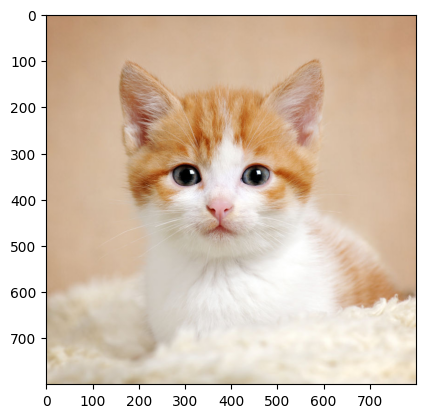

In [81]:
img = cv2.imread('test_cat.jpg')
plt.imshow(img[:,:, ::-1])

In [82]:
(img.shape[0] // 2, img.shape[1] //2)

(400, 400)

## let try the three matrix above with opencv function warpAffine

cv2.warpAffine is a function in OpenCV used for applying affine transformations to images.  
Affine transformations include operations like translation (shifting), rotation, scaling, and shearing.   
The function allows you to perform these transformations by specifying a transformation matrix.  

In [110]:
m1 = np.array([
    [0., 1., 0.],
    [-1., 0., 800.],
])


m2 = np.array([
    [0.5, 0, 200],
    [0, 0.5, 200],
])



m3 = np.array([
    [1, 0.0, 100],
    [0, 1, 0],
  
], dtype=np.float64)


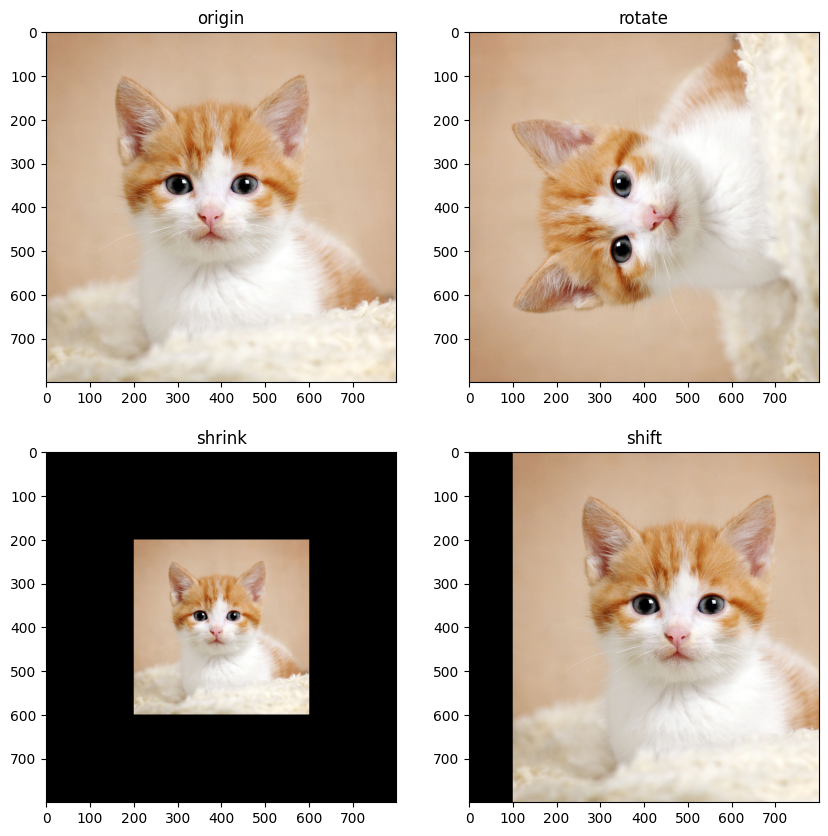

In [111]:
figure = plt.figure(figsize=(10, 10))


figure.add_subplot(2, 2, 1)
plt.imshow(img[:,:,::-1])
plt.title('origin')

rotate_img = cv2.warpAffine(img, m1,(img.shape[0], img.shape[1]))
figure.add_subplot(2, 2, 2)
plt.imshow(rotate_img[:,:,::-1])
plt.title('rotate')

shrink_img = cv2.warpAffine(img, m2,(img.shape[0], img.shape[1]))
figure.add_subplot(2, 2, 3)
plt.imshow(shrink_img[:,:,::-1])
plt.title('shrink')


shift_img = cv2.warpAffine(img, m3,(img.shape[0], img.shape[1]))
figure.add_subplot(2, 2, 4)
plt.imshow(shift_img[:,:,::-1])
plt.title('shift')

plt.show()


